<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/BIGBOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('/content/Book1.csv')
df

,date,SPI1,sl1,avg R.HUM,an.temp,a.solar
0,01-01-1980,-1.714817,0.889794,0.632411,-2.147330,4.515143
1,01-02-1980,-1.469306,-1.714817,0.680302,-3.151907,0.925778
2,01-03-1980,-1.469306,-1.469306,0.749740,-1.640669,-1.818487
3,01-04-1980,-1.469306,-1.469306,0.856281,0.078177,-0.988543
4,01-05-1980,-1.469306,-1.469306,0.942733,2.525315,5.825042
...,...,...,...,...,...,...
408,01-01-2014,0.317544,0.143235,0.783198,-1.859363,1.881506
409,01-02-2014,0.546507,0.317544,0.946414,1.889010,-0.766231
410,01-03-2014,0.629004,0.546507,0.959161,2.218363,0.234905
411,01-04-2014,0.174373,0.629004,0.892296,1.309410,-1.471623


In [65]:
 df['date_time'] = pd.to_datetime(df['date'], infer_datetime_format=True)


In [66]:
 df.index = pd.to_datetime(df['date_time'], format='%d.%m.%Y')
 df = df.drop(columns = ['date','date_time'])
 df

,SPI1,sl1,avg R.HUM,an.temp,a.solar
date_time,,,,,
1980-01-01,-1.714817,0.889794,0.632411,-2.147330,4.515143
1980-01-02,-1.469306,-1.714817,0.680302,-3.151907,0.925778
1980-01-03,-1.469306,-1.469306,0.749740,-1.640669,-1.818487
1980-01-04,-1.469306,-1.469306,0.856281,0.078177,-0.988543
1980-01-05,-1.469306,-1.469306,0.942733,2.525315,5.825042
...,...,...,...,...,...
2014-01-01,0.317544,0.143235,0.783198,-1.859363,1.881506
2014-01-02,0.546507,0.317544,0.946414,1.889010,-0.766231
2014-01-03,0.629004,0.546507,0.959161,2.218363,0.234905


In [199]:
def df_to_X_y2(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [200]:
X, y = df_to_X_y2(df)
X.shape, y.shape

((408, 5, 5), (408,))

In [201]:
X_train, y_train = X[:152], y[:152]
X_val, y_val = X[152:304], y[152:304]
X_test, y_test = X[304:], y[304:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((152, 5, 5), (152,), (152, 5, 5), (152,), (104, 5, 5), (104,))

In [202]:
temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 1])
temp_training_std = np.std(X_train[:, :, 1])

                           
def preprocess(X):
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean) / temp_training_std
  return X


temp_training_mean = np.mean(X_train[:, :, 2])
temp_training_std = np.std(X_train[:, :, 2])

                           
def preprocess(X):
  X[:, :, 2] = (X[:, :, 2] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                           
def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                           
def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X  
temp_training_mean = np.mean(X_train[:, :, 4])
temp_training_std = np.std(X_train[:, :, 4])

                           
def preprocess(X):
  X[:, :, 4] = (X[:, :, 4] - temp_training_mean) / temp_training_std
  return X  

In [ ]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [204]:
p_training_mean3 = np.mean(X_train[:, :, 0])
p_training_std3 = np.std(X_train[:, :, 0])

def preprocess_output3(y):
  y[:] = (y[:] - p_training_mean3) / p_training_std3
  return y

In [ ]:
preprocess_output3(y_train)
preprocess_output3(y_val)
preprocess_output3(y_test)

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((5, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 64)                17920     
                                                                 
 dense_34 (Dense)            (None, 8)                 520       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [208]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [209]:
model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp4])

Epoch 1/100
1/5 [=====>........................] - ETA: 12s - loss: 1.0120 - root_mean_squared_error: 1.0060

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


5/5 [==============================] - 8s 1s/step - loss: 0.9994 - root_mean_squared_error: 0.9997 - val_loss: 0.7258 - val_root_mean_squared_error: 0.8519
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.9896 - root_mean_squared_error: 0.9948 - val_loss: 0.7272 - val_root_mean_squared_error: 0.8528
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.9800 - root_mean_squared_error: 0.9900 - val_loss: 0.7287 - val_root_mean_squared_error: 0.8536
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.9704 - root_mean_squared_error: 0.9851 - val_loss: 0.7300 - val_root_mean_squared_error: 0.8544
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.9626 - root_mean_squared_error: 0.9811 - val_loss: 0.7318 - val_root_mean_squared_error: 0.8554
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.9543 - root_mean_squared_error: 0.9769 - val_loss: 0.7336 - val_root_mean_squared_error: 0

In [210]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

In [211]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  temp_preds = postprocess_temp(predictions)
  temp_actuals =postprocess_temp(y)
  print(predictions.shape)
  print(y.shape)
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  
  return df[start:end]


(104,)
(104,)


,Temperature Predictions,Temperature Actuals
0,-0.469729,-1.464371
1,-1.720745,-1.464371
2,-1.744405,5.198469
3,-0.665194,3.022246
4,0.315590,-0.055137
...,...,...
95,-1.441905,-1.746480
96,-2.039468,-6.935281
97,-2.188373,-6.935281
98,-2.533447,0.779040


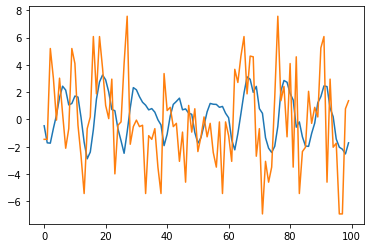

In [212]:
post_processed_df = plot_predictions2(model4, X_test, y_test)
post_processed_df


In [213]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  print(predictions.shape)
  print(y.shape)
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(104,)
(104,)


(     Predictions   Actuals
 0      -0.227303 -0.514328
 1      -0.588309 -0.514328
 2      -0.595137  1.408369
 3      -0.283709  0.780376
 4      -0.000684 -0.107665
 ..           ...       ...
 99     -0.588182  0.302575
 100    -0.129897  0.525246
 101     0.323294  0.605477
 102     0.688727  0.163337
 103     0.591977  1.106633
 
 [104 rows x 2 columns], 0.9684057436951256)

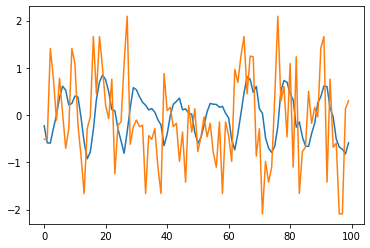

In [214]:
plot_predictions1(model4, X_test, y_test)
